# <font color="green">Linear , Ridge , Lasso , Logistic , Random Forest regressions</font>

### importing data and analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
from sklearn.datasets import load_boston

In [4]:
df=load_boston()

In [5]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [6]:
dataset=pd.DataFrame(df.data)

In [7]:
dataset.columns=df.feature_names

In [8]:
dataset["Price"]=df.target

In [9]:
dataset.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [10]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
X=dataset.iloc[:,:-1]

In [12]:
y=dataset.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

### linear_regression

In [14]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred=lin_reg.predict(X_test)

In [15]:
from sklearn.model_selection import cross_val_score
mse=cross_val_score(lin_reg,X_train,y_train,scoring="neg_mean_squared_error",cv=5)
mean_mse=np.mean(mse)
print(mean_mse)

-22.337609842051044


In [16]:
from sklearn.metrics import r2_score
r2_score1=((r2_score(y_pred,y_test))*100).round(2)

In [17]:
r2_score1

49.68

### Ridge

In [18]:
from sklearn.linear_model import Ridge

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred1=ridge.predict(X_test)

In [21]:
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200]}

In [22]:
ridge_regressor=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)

ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100, 200]},
             scoring='neg_mean_squared_error')

In [23]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1e-15}
-22.337609842051123


In [24]:
from sklearn.metrics import r2_score
r2_score2=((r2_score(y_pred1,y_test))*100).round(2)

In [25]:
r2_score2

47.99

### Lasso

In [26]:
from sklearn.linear_model import Lasso

In [27]:
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
lasso.fit(X_train,y_train)
y_pred2=lasso.predict(X_test)

In [28]:
params={"alpha":[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,200]}

In [29]:
lasso_regressor=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75,
                                   80, 85, 90, 95, 100, 200]},
             scoring='neg_mean_squared_error')

In [30]:
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1e-15}
-22.3376098420511


In [31]:
from sklearn.metrics import r2_score
r2_score3=((r2_score(y_pred2,y_test))*100).round(2)

In [32]:
r2_score3

20.94

In [33]:
result=pd.DataFrame({"algorithum":["lin","ridge","lasso"],"score":[mean_mse,ridge_regressor.best_score_,lasso_regressor.best_score_],"r2_score":[r2_score1,r2_score2,r2_score3]})

In [34]:
result

,algorithum,score,r2_score
0,lin,-22.33761,49.68
1,ridge,-22.33761,47.99
2,lasso,-22.33761,20.94


## logistic regression 

In [35]:
from sklearn.datasets import load_breast_cancer

In [36]:
df2=load_breast_cancer()

In [37]:
X=pd.DataFrame(df2["data"],columns=df2["feature_names"])

In [38]:
y=pd.DataFrame(df2["target"],columns=["Target"])

In [39]:
y.value_counts()

Target
1         357
0         212
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [41]:
params2=[{"C":[1,5,10]},{"max_iter":[100,150]}]

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
model1=LogisticRegression(C=100,max_iter=100)

In [44]:
model=GridSearchCV(model1,param_grid=params2,scoring='f1',cv=5)

In [45]:
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(C=100),
             param_grid=[{'C': [1, 5, 10]}, {'max_iter': [100, 150]}],
             scoring='f1')

In [46]:
model.best_params_

{'C': 5}

In [47]:
(model.best_score_)*100

96.46571282391058

In [48]:
y_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [50]:
confusion_matrix(y_test,y_pred)

array([[51,  2],
       [ 6, 84]], dtype=int64)

In [51]:
((accuracy_score(y_pred,y_test))*100).round(2)

94.41

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93        53
           1       0.98      0.93      0.95        90

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143



## Decision tree algorithum

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
from sklearn.datasets import load_iris

In [55]:
iris=load_iris()

In [56]:
dataset=pd.DataFrame(iris.data,columns=[iris.feature_names] )

In [57]:
dataset.columns=iris.feature_names

In [58]:
dataset.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [59]:
dataset["Target"]=iris.target

In [60]:
dataset[["Target"]]

,Target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [61]:
from sklearn.tree import DecisionTreeClassifier
Classifier=DecisionTreeClassifier()
Classifier.fit(iris.data,iris.target)

DecisionTreeClassifier()

[Text(0.5, 0.9166666666666666, 'X[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'X[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'X[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

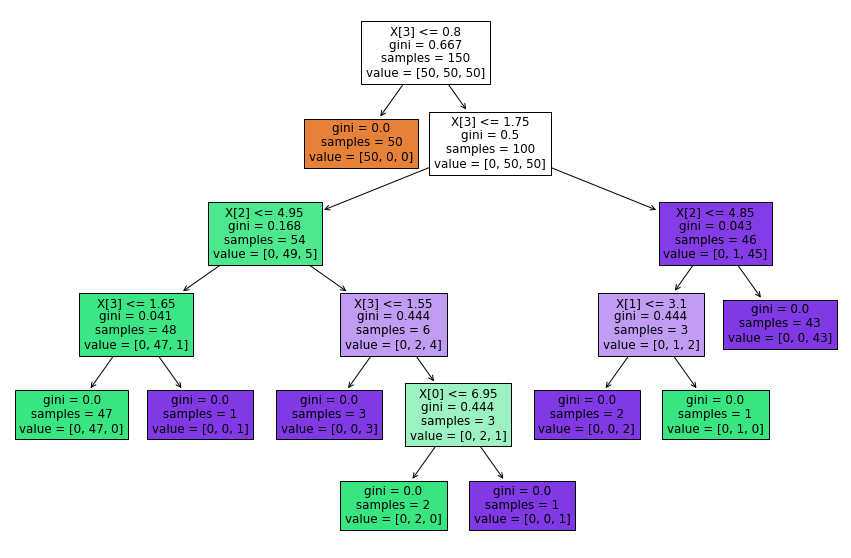

In [62]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(Classifier,filled=True)